In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

idx = pd.IndexSlice

교보 현재 랭킹 : kyobo_best.ipynb
-> 다운 파일 : rank_kyobo.xlsx

교보 매월 랭킹 : kyobo_month.ipynb
-> 다운 파일 : rank_monthly_kyobo.csv

예스24 매월 랭킹 : yes24_month.ipynb
-> 다운 파일 : rank_monthly_yes24.csv

In [58]:
kyobo_best = pd.read_excel('rank_kyobo.xlsx')
rank_monthly_kyobo = pd.read_csv('rank_monthly_kyobo.csv', encoding='utf-8', thousands=',')
rank_monthly_yes24 = pd.read_csv('rank_monthly_yes24.csv', encoding='utf-8', thousands=',')
yes24_best = pd.read_csv('rank_yes24.csv', encoding='utf-8', thousands=',')

In [59]:
# 교보 현재 베스트셀러
kyobo_best
# kyobo_best -> rank 를 index로 변환해서 사용하기

,rank,title,author,publisher,publish_date,price,discount,review_cnt,site
0,1,최소한의 삼국지,최태성,프런트페이지,2025.11.18,17550,10,9.86,교보문고
1,2,나나 올리브에게,루리,문학동네,2025.11.20,13500,10,9.79,교보문고
2,3,트렌드 코리아 2026,김난도 외,미래의창,2025.09.24,18000,10,9.59,교보문고
3,4,절대 실패 없는 금 투자,배재한,경향BP,2025.11.12,19350,10,9.97,교보문고
4,5,절창,구병모,문학동네,2025.09.17,16200,10,9.51,교보문고
5,6,마일리지 아워,최유나,북로망스,2025.11.26,19800,10,9.78,교보문고
6,7,피지컬 AI 패권 전쟁,박종성,지니의서재,2025.12.05,17820,10,9.38,교보문고
7,8,어른의 행복은 조용하다,태수,페이지2북스,2024.11.04,16020,10,9.47,교보문고
8,9,예약판매피크 코리아,백우열,현암사,2025.12.15,20700,10,10.00,교보문고
9,10,어른의 품위,최서영,북로망스,2025.10.01,17550,10,9.52,교보문고


In [60]:
# yes24 현재 베스트셀러
yes24_best
# rank_monthly_yes24 에서 2025년 12월 데이터 추출해서 사용

,year,month,rank,title,author,publisher,publish_date,price,discount,review_cnt,score,site
0,2025,12,1,무적 LG : V4 달성 기념 화보집,편집부,스포츠서울,2025년11월,39600,10,5,10.0,예스24
1,2025,12,2,최소한의 삼국지,최태성,프런트페이지,2025년11월,17550,10,31,9.2,예스24
2,2025,12,3,위대한 응원! 새로운 비상! 한화 이글스,편집부,스포츠서울,2025년11월,39600,10,2,10.0,예스24
3,2025,12,4,트렌드 코리아 2026,"김난도, 전미영, 최지혜, 권정윤, 한다혜 외 7명",미래의창,2025년09월,18000,10,163,9.2,예스24
4,2025,12,5,어른의 행복은 조용하다,태수,페이지2북스,2024년11월,16020,10,401,9.5,예스24
5,2025,12,6,혼모노,성해나,창비,2025년03월,16200,10,674,9.1,예스24
6,2025,12,7,피크 코리아,백우열,현암사,2025년12월,20700,10,0,0.0,예스24
7,2025,12,8,박곰희 연금 부자 수업,박곰희,인플루엔셜,2025년06월,18900,10,180,9.7,예스24
8,2025,12,9,괴테는 모든 것을 말했다,스즈키 유이,리프,2025년11월,15300,10,64,9.7,예스24
9,2025,12,10,절창 切創,구병모,문학동네,2025년09월,16200,10,188,9.3,예스24


In [61]:
# 교보 월별 베스트셀러
rank_monthly_kyobo

,rank,ym,title,author,publisher,pub_date,discount,price,original_price,point,score,review_cnt,intro,url,site
0,1,202412,트렌드 코리아 2026,김난도 외,미래의창,2025.09.24,10%,18000,"20,000원",1000,9.59,230,"세상은 작용과 반작용, 치열한 정반합(正反合)의 소용돌이가 거세게 휘몰아치고 있다....",https://product.kyobobook.co.kr/detail/S000217...,교보문고
1,2,202412,절창,구병모,문학동네,2025.09.17,10%,16200,"18,000원",900,9.51,427,"더이상의 수식이 필요치 않은 작가, 그 이름이 하나의 브랜드가 된 구병모의 신작 장...",https://product.kyobobook.co.kr/detail/S000217...,교보문고
2,3,202412,다크 심리학,다크 사이드 프로젝트,어센딩,2025.07.31,10%,19710,"21,900원",1090,9.20,515,‘다크 심리학’은 인간 본성의 어두운 면을 탐구하여 타인의 감정을 조종하거나 조작하...,https://product.kyobobook.co.kr/detail/S000217...,교보문고
3,4,202412,위버멘쉬,프리드리히 니체,떠오름(RISE),2025.03.14,10%,16020,"17,800원",890,9.32,373,『위버멘쉬』는 니체가 주장한 ‘초인(Übermensch)’의 철학을 현대적으로 풀어...,https://product.kyobobook.co.kr/detail/S000215...,교보문고
4,5,202412,모순,양귀자,쓰다,2013.04.01,10%,11700,"13,000원",650,9.79,3355,양귀자 소설의 힘을 보여준 베스트셀러 『모순』. 1998년에 초판이 출간된 이후 1...,https://product.kyobobook.co.kr/detail/S000001...,교보문고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,46,202512,가공범,히가시노 게이고,북다,2025.07.21,10%,19800,"22,000원",1100,9.66,389,"히가시노 게이고 작가 데뷔 40주년!\n\n진실을 찾는 눈, 진심을 향한 걸음 \n...",https://product.kyobobook.co.kr/detail/S000217...,교보문고
646,47,202512,결국 너의 시간은 온다,염경엽,웅진지식하우스,2025.11.12,10%,17100,"19,000원",950,10.00,74,"선수·단장·감독으로서 모두 우승을 경험한 KBO 최초의 인물이자, 프로야구 역대 1...",https://product.kyobobook.co.kr/detail/S000218...,교보문고
647,48,202512,쇼펜하우어 인생수업: 한 번뿐인 삶 이렇게 살아라(리커버 에디션),쇼펜하우어,하이스트,2024.02.20,10%,15750,"17,500원",870,9.52,429,"독자들에게 쇼펜하우어의 철학을 쉽게 접근하고 이해할 수 있는 방법을 제공하며,\n그...",https://product.kyobobook.co.kr/detail/S000212...,교보문고
648,49,202512,달러 자산 1억으로 평생 월급 완성하라(2026 투자 전략 특별판),채부심(채상욱),몽스북,2025.08.25,10%,18900,"21,000원",1050,9.45,153,대한민국은 전 세계에서 손꼽히는 ‘재테크 과몰입 사회’다. 아침에 눈을 뜨면 미국 ...,https://product.kyobobook.co.kr/detail/S000217...,교보문고


In [62]:
# yes24 월별 베스트셀러
rank_monthly_yes24

,year,month,rank,title,author,publisher,publish_date,price,discount,review_cnt,score,site
0,2025,1,1,소년이 온다,한강,창비,2014년05월,13500,10,4537,9.7,예스24
1,2025,1,2,채식주의자,한강,창비,2022년03월,15300,10,1723,9.2,예스24
2,2025,1,3,행동하지 않으면 인생은 바뀌지 않는다,브라이언 트레이시,현대지성,2024년11월,15210,10,368,9.4,예스24
3,2025,1,4,작별하지 않는다,한강,문학동네,2021년09월,15120,10,2474,9.6,예스24
4,2025,1,5,초역 부처의 말,코이케 류노스케,포레스트북스,2024년05월,16020,10,624,9.5,예스24
...,...,...,...,...,...,...,...,...,...,...,...,...
595,2025,12,46,된다! 하루 만에 끝내는 제미나이 활용법,권서림,이지스퍼블리싱,2025년11월,18000,10,22,10.0,예스24
596,2025,12,47,미술관 여행자를 위한 도슨트 북,카미유 주노,윌북(willbook),2025년10월,29700,10,85,9.2,예스24
597,2025,12,48,어른의 품격을 채우는 100일 필사 노트,김종원,청림Life,2025년03월,18000,10,218,9.8,예스24
598,2025,12,49,코스모스,칼 에드워드 세이건,사이언스북스,2006년12월,19800,10,2180,9.6,예스24


In [63]:
# 교보문고와 YES24의 도서 판매가와 평점을 각각 비교하는 상자 그림 (Box Plot)
kyobo_plot = kyobo_best[['price','review_cnt']].copy()
yes24_plot = yes24_best[['price','score']].copy()

kyobo_plot['site'] = 'Kyobo'
yes24_plot['site'] = 'Yes24'

yes24_plot['site'] = 'Yes24'


In [64]:
df_plot = pd.concat([kyobo_plot, yes24_plot], ignore_index=True)

C:\Users\Dell3571\AppData\Local\Temp\ipykernel_20472\1269038349.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


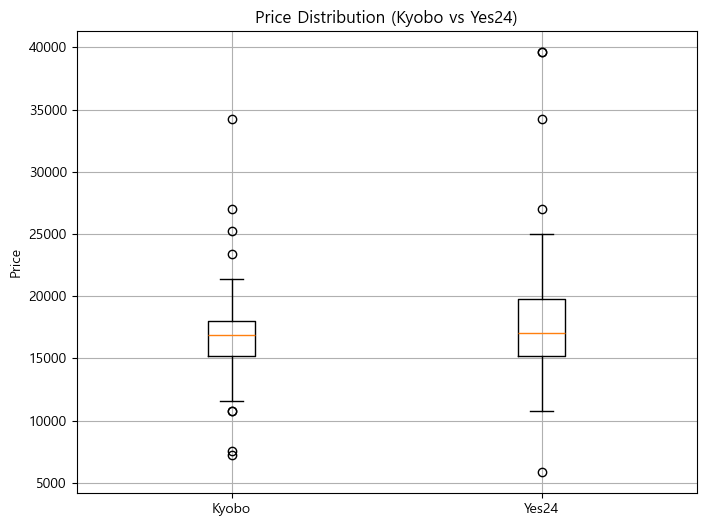

In [66]:
plt.figure(figsize=(8,6))

plt.boxplot(
    [
        kyobo_best['price'].dropna(),      # 교보 가격
        yes24_best['price'].dropna()       # YES24 가격
    ],
    labels=['Kyobo', 'Yes24']
)

plt.title('Price Distribution (Kyobo vs Yes24)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


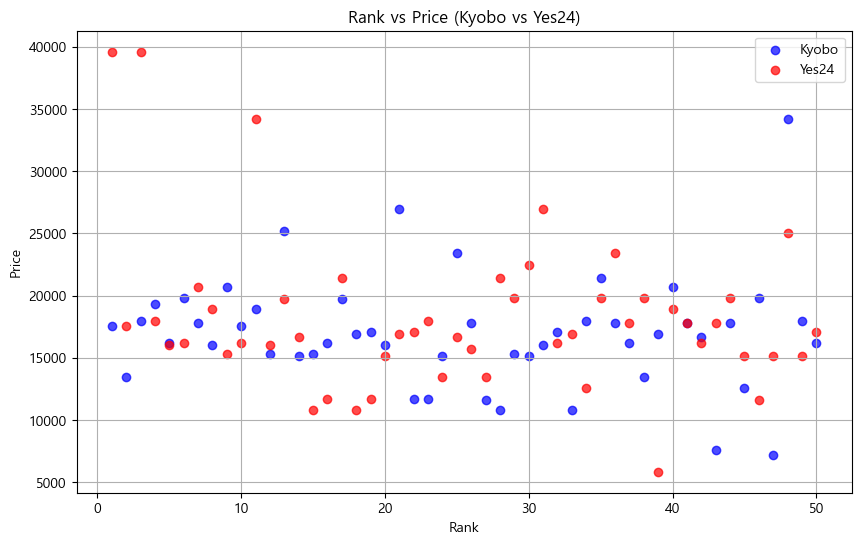

In [69]:
# 순위별 가격대 추이
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# 교보문고 산점도
plt.scatter(
    kyobo_best['rank'], 
    kyobo_best['price'], 
    color='blue', 
    alpha=0.7, 
    label='Kyobo'
)

# YES24 산점도
plt.scatter(
    yes24_best['rank'], 
    yes24_best['price'], 
    color='red', 
    alpha=0.7, 
    label='Yes24'
)

plt.title('Rank vs Price (Kyobo vs Yes24)')
plt.xlabel('Rank')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



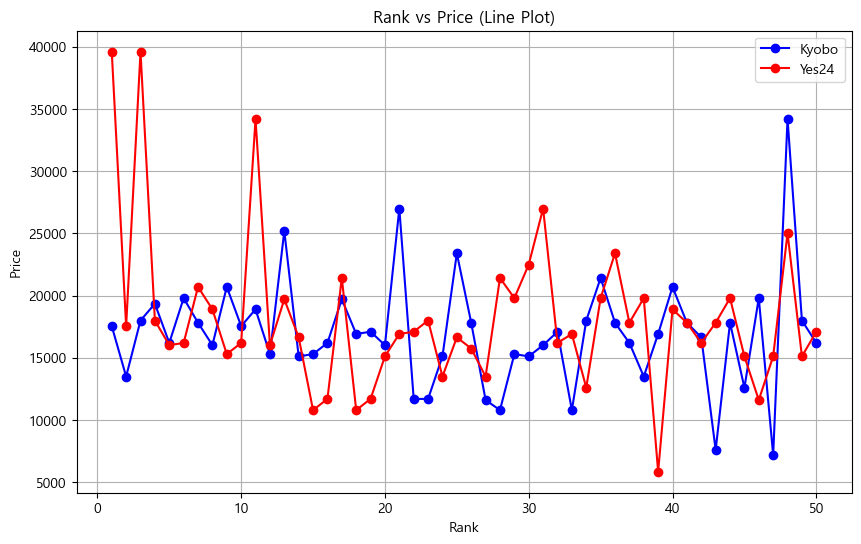

In [68]:
import matplotlib.pyplot as plt

# rank 기준으로 정렬 (안 되어 있으면 꺾은선이 꼬임)
kyobo_sorted = kyobo_best.sort_values('rank')
yes24_sorted = yes24_best.sort_values('rank')

plt.figure(figsize=(10,6))

# 교보문고
plt.plot(
    kyobo_sorted['rank'],
    kyobo_sorted['price'],
    marker='o',
    color='blue',
    label='Kyobo'
)

# YES24
plt.plot(
    yes24_sorted['rank'],
    yes24_sorted['price'],
    marker='o',
    color='red',
    label='Yes24'
)

plt.title('Rank vs Price (Line Plot)')
plt.xlabel('Rank')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
